<a href="https://colab.research.google.com/github/NickMattiss/ai-ml-principles-exercises/blob/main/ovning1_ai_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import sklearn
import numpy as np

In [5]:
import sklearn.datasets as datasets

In [6]:
data = datasets.load_digits()

In [7]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [8]:
len(data.images)

1797

In [11]:
type(data.images[0])

numpy.ndarray

In [12]:
data.images[0].shape

(8, 8)

In [13]:
data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [15]:
data.images[0].dtype

dtype('float64')

In [14]:
data.target[0]

0

In [17]:
np.max(data.images)

16.0

In [19]:
(data.images[0] / 16 * 255).astype(np.uint8)

array([[  0,   0,  79, 207, 143,  15,   0,   0],
       [  0,   0, 207, 239, 159, 239,  79,   0],
       [  0,  47, 239,  31,   0, 175, 127,   0],
       [  0,  63, 191,   0,   0, 127, 127,   0],
       [  0,  79, 127,   0,   0, 143, 127,   0],
       [  0,  63, 175,   0,  15, 191, 111,   0],
       [  0,  31, 223,  79, 159, 191,   0,   0],
       [  0,   0,  95, 207, 159,   0,   0,   0]], dtype=uint8)

In [20]:
from PIL import Image

2


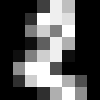

In [34]:
i = 2
print(data.target[i])
Image.fromarray((data.images[i] / 16 * 255).astype(np.uint8), "L").resize((100, 100), resample=Image.NEAREST)